In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

def lsm0(x, y):
    k = np.mean(x*y) / np.mean(x**2)
    sigma_k = (1 / len(x))*np.sqrt((np.mean(y**2) / (np.mean(x**2))) - k**2)
    return [k, sigma_k]

In [2]:
lab1 = pd.read_excel("comb.xlsx")
lab1

,N,permutations,time1,time2,time3,time4,time5
0,10,20,3.200000e-06,NaN,NaN,NaN,NaN
1,11,19,1.900000e-06,NaN,NaN,NaN,NaN
2,16,37,3.300000e-06,NaN,NaN,NaN,NaN
3,17,59,4.600000e-06,NaN,NaN,NaN,NaN
4,19,103,6.800000e-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
94,254,15275,9.707000e-04,1.308800e-03,5.037000e-04,5.039000e-04,5.044000e-04
95,342,28925,1.604200e-03,2.475900e-03,9.914000e-04,9.409000e-04,2.318100e-03
96,358,1,4.000000e-07,8.000000e-07,2.000000e-07,4.000000e-07,3.000000e-07
97,366,33747,1.770600e-03,2.832000e-03,1.217400e-03,1.091500e-03,1.253300e-03


In [3]:
lab1["time"] = lab1[['time1', 'time2', 'time3', 'time4', 'time5']].mean(axis=1)
lab1

,N,permutations,time1,time2,time3,time4,time5,time
0,10,20,3.200000e-06,NaN,NaN,NaN,NaN,3.200000e-06
1,11,19,1.900000e-06,NaN,NaN,NaN,NaN,1.900000e-06
2,16,37,3.300000e-06,NaN,NaN,NaN,NaN,3.300000e-06
3,17,59,4.600000e-06,NaN,NaN,NaN,NaN,4.600000e-06
4,19,103,6.800000e-06,NaN,NaN,NaN,NaN,6.800000e-06
...,...,...,...,...,...,...,...,...
94,254,15275,9.707000e-04,1.308800e-03,5.037000e-04,5.039000e-04,5.044000e-04,7.583000e-04
95,342,28925,1.604200e-03,2.475900e-03,9.914000e-04,9.409000e-04,2.318100e-03,1.666100e-03
96,358,1,4.000000e-07,8.000000e-07,2.000000e-07,4.000000e-07,3.000000e-07,4.200000e-07
97,366,33747,1.770600e-03,2.832000e-03,1.217400e-03,1.091500e-03,1.253300e-03,1.632960e-03


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


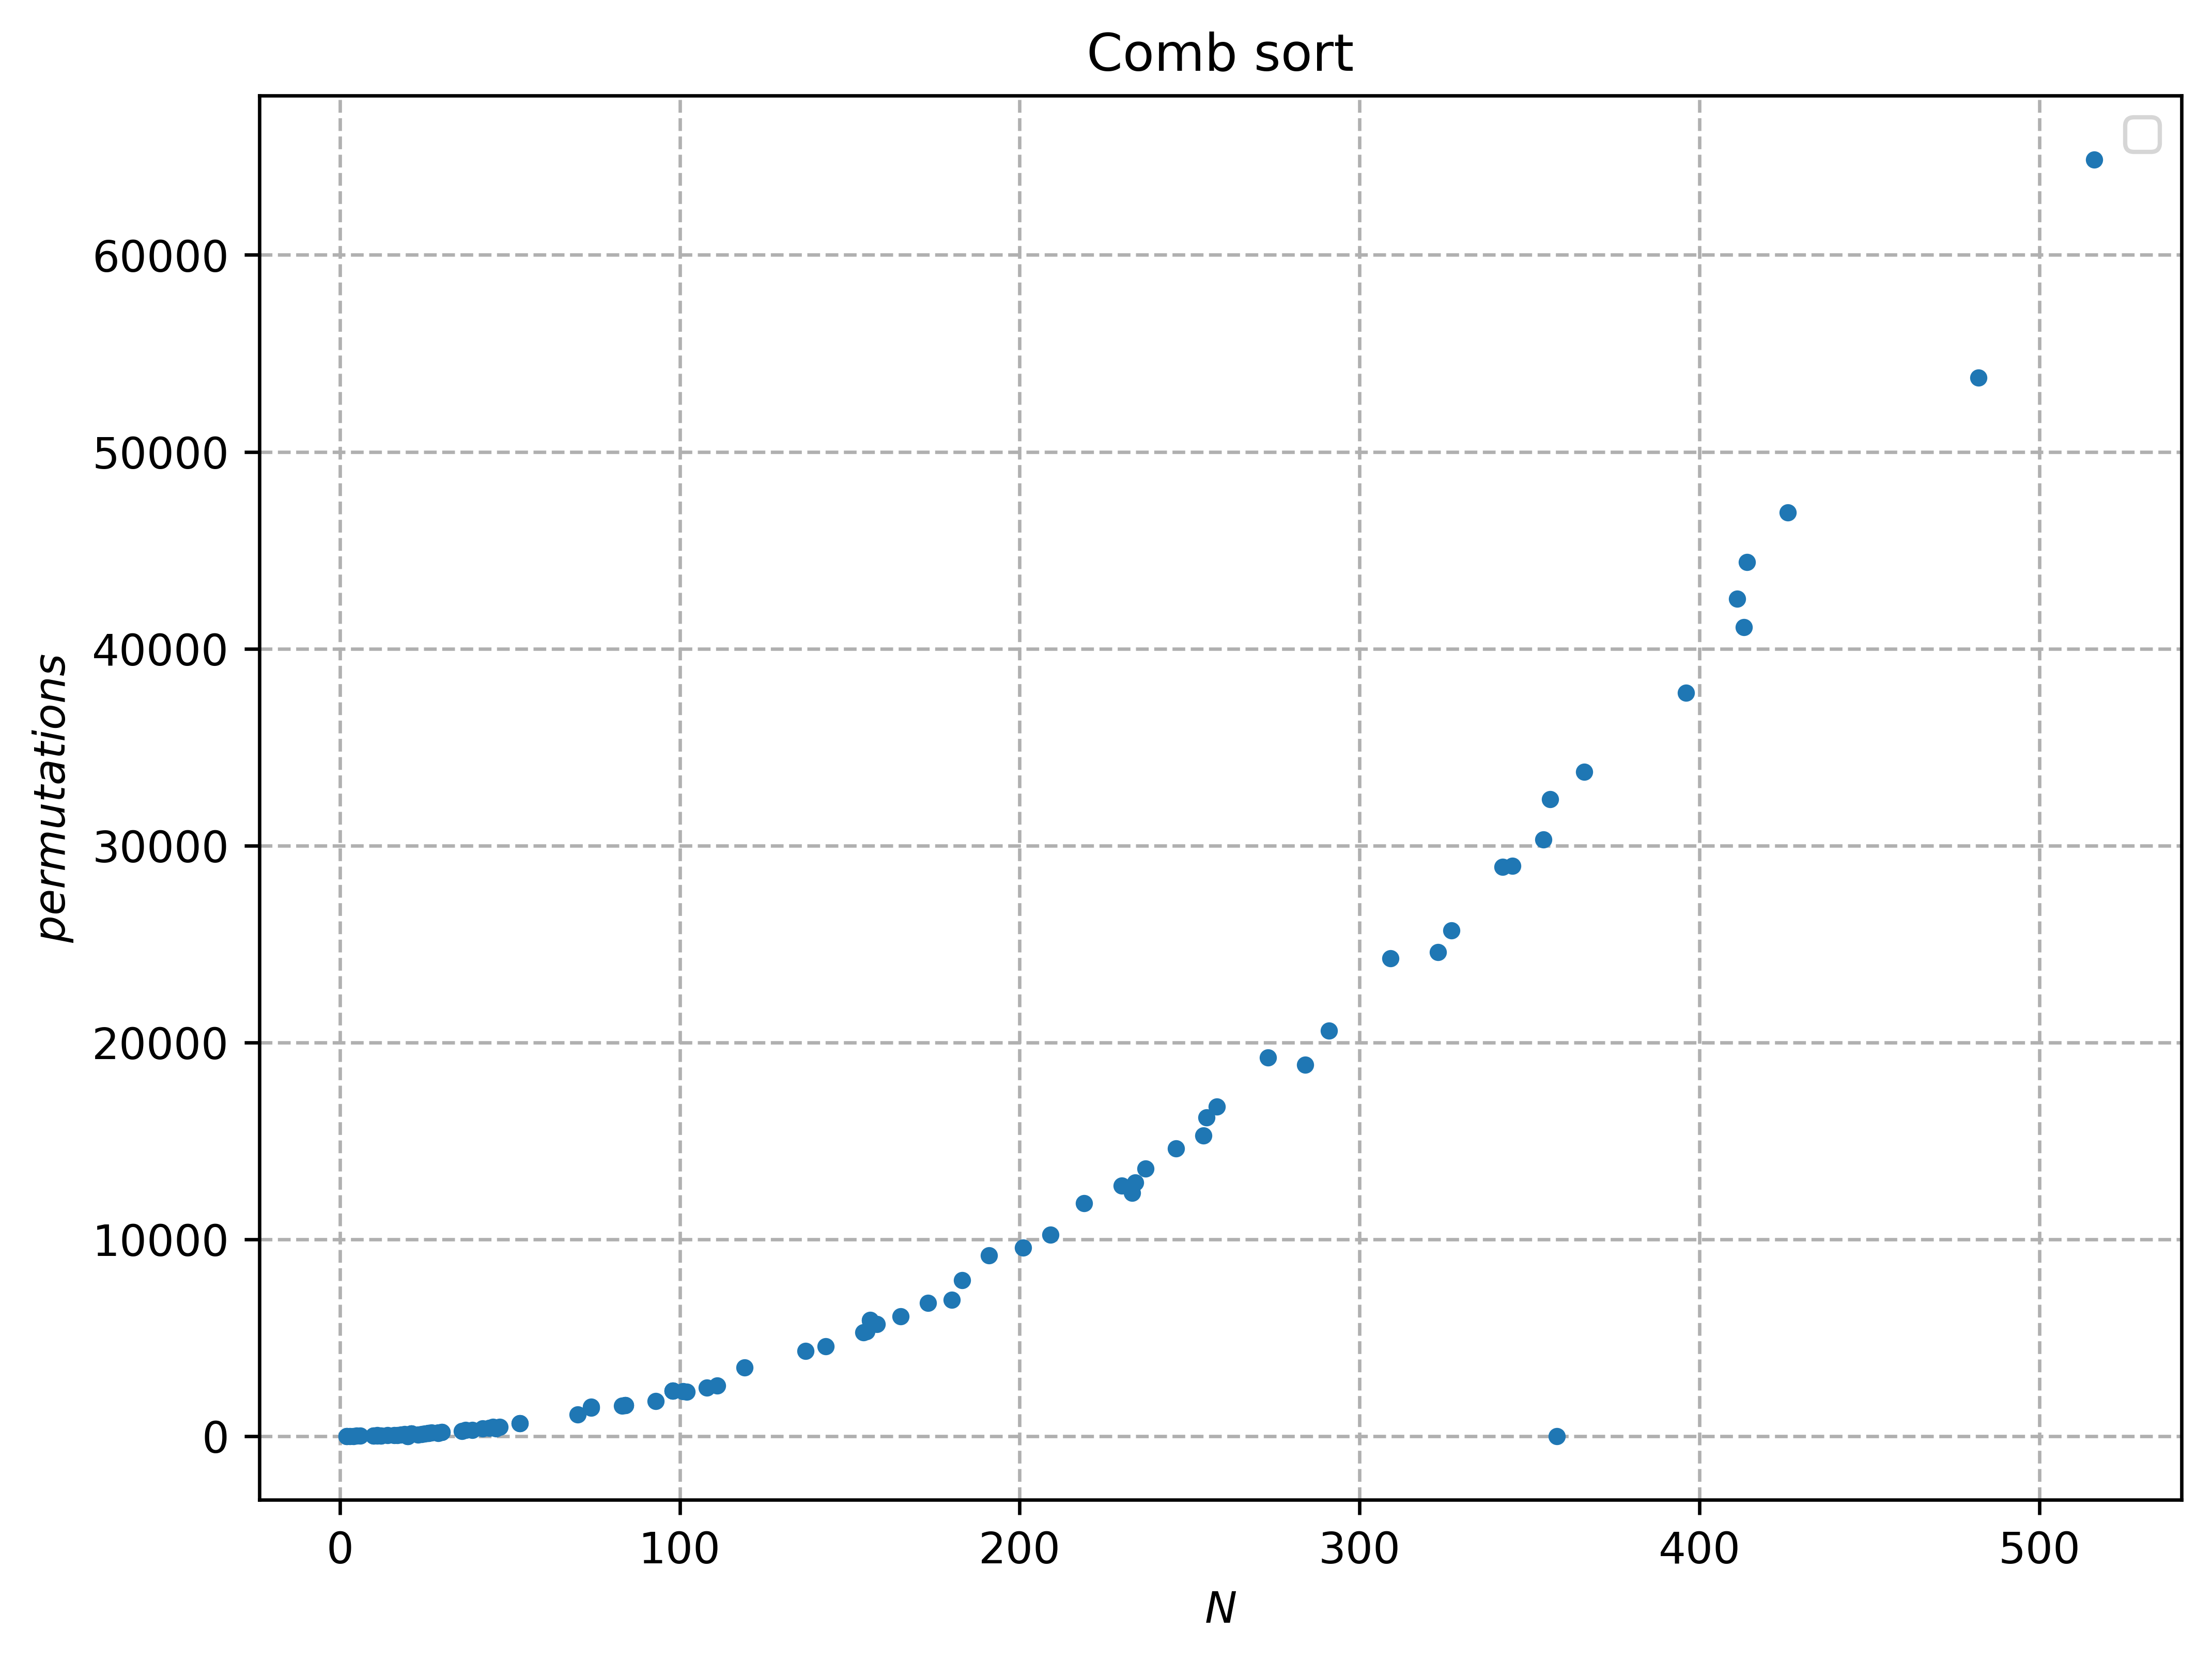

In [7]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Comb sort")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$permutations$")
plt.grid(True, linestyle="--") # пунктирная сетка
plt.plot(lab1["N"], lab1["permutations"], '.')

# plt.legend()
plt.show()

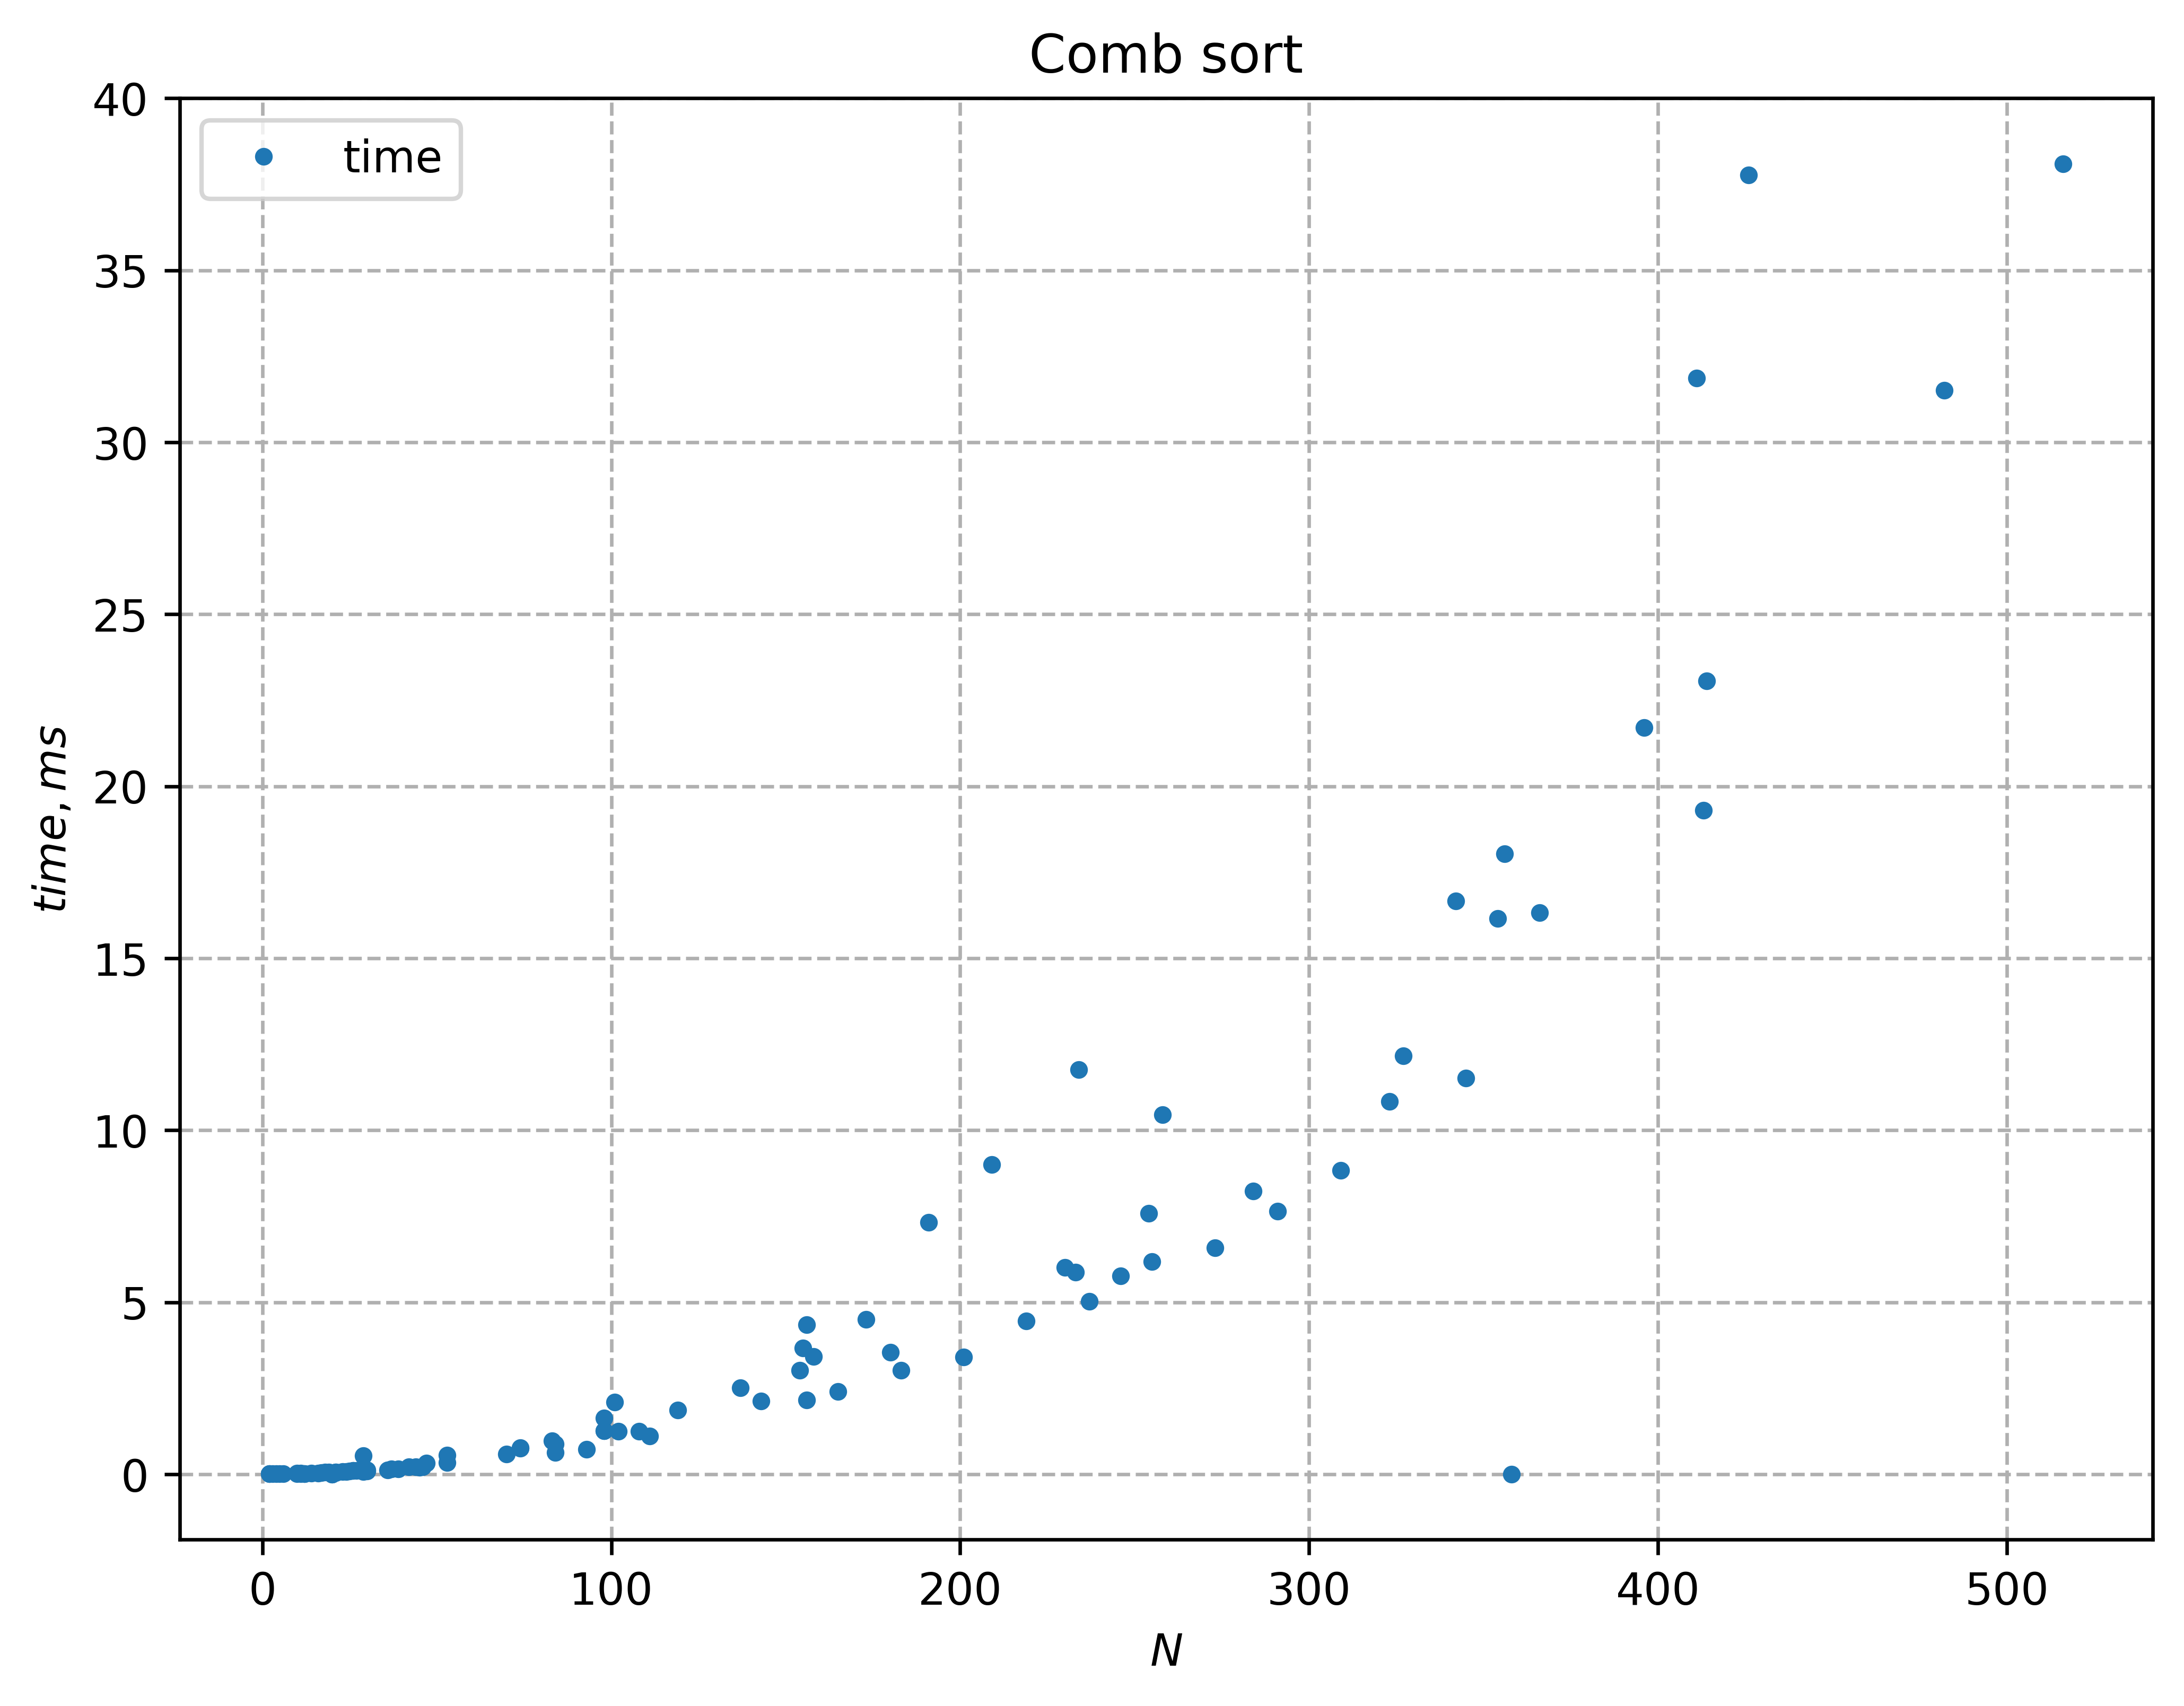

In [13]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Comb sort")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$time, ms$")
plt.grid(True, linestyle="--") # пунктирная сетка
plt.plot(lab1["N"], 10e3*lab1["time"], '.', label="time")

# plt.legend()
plt.show()

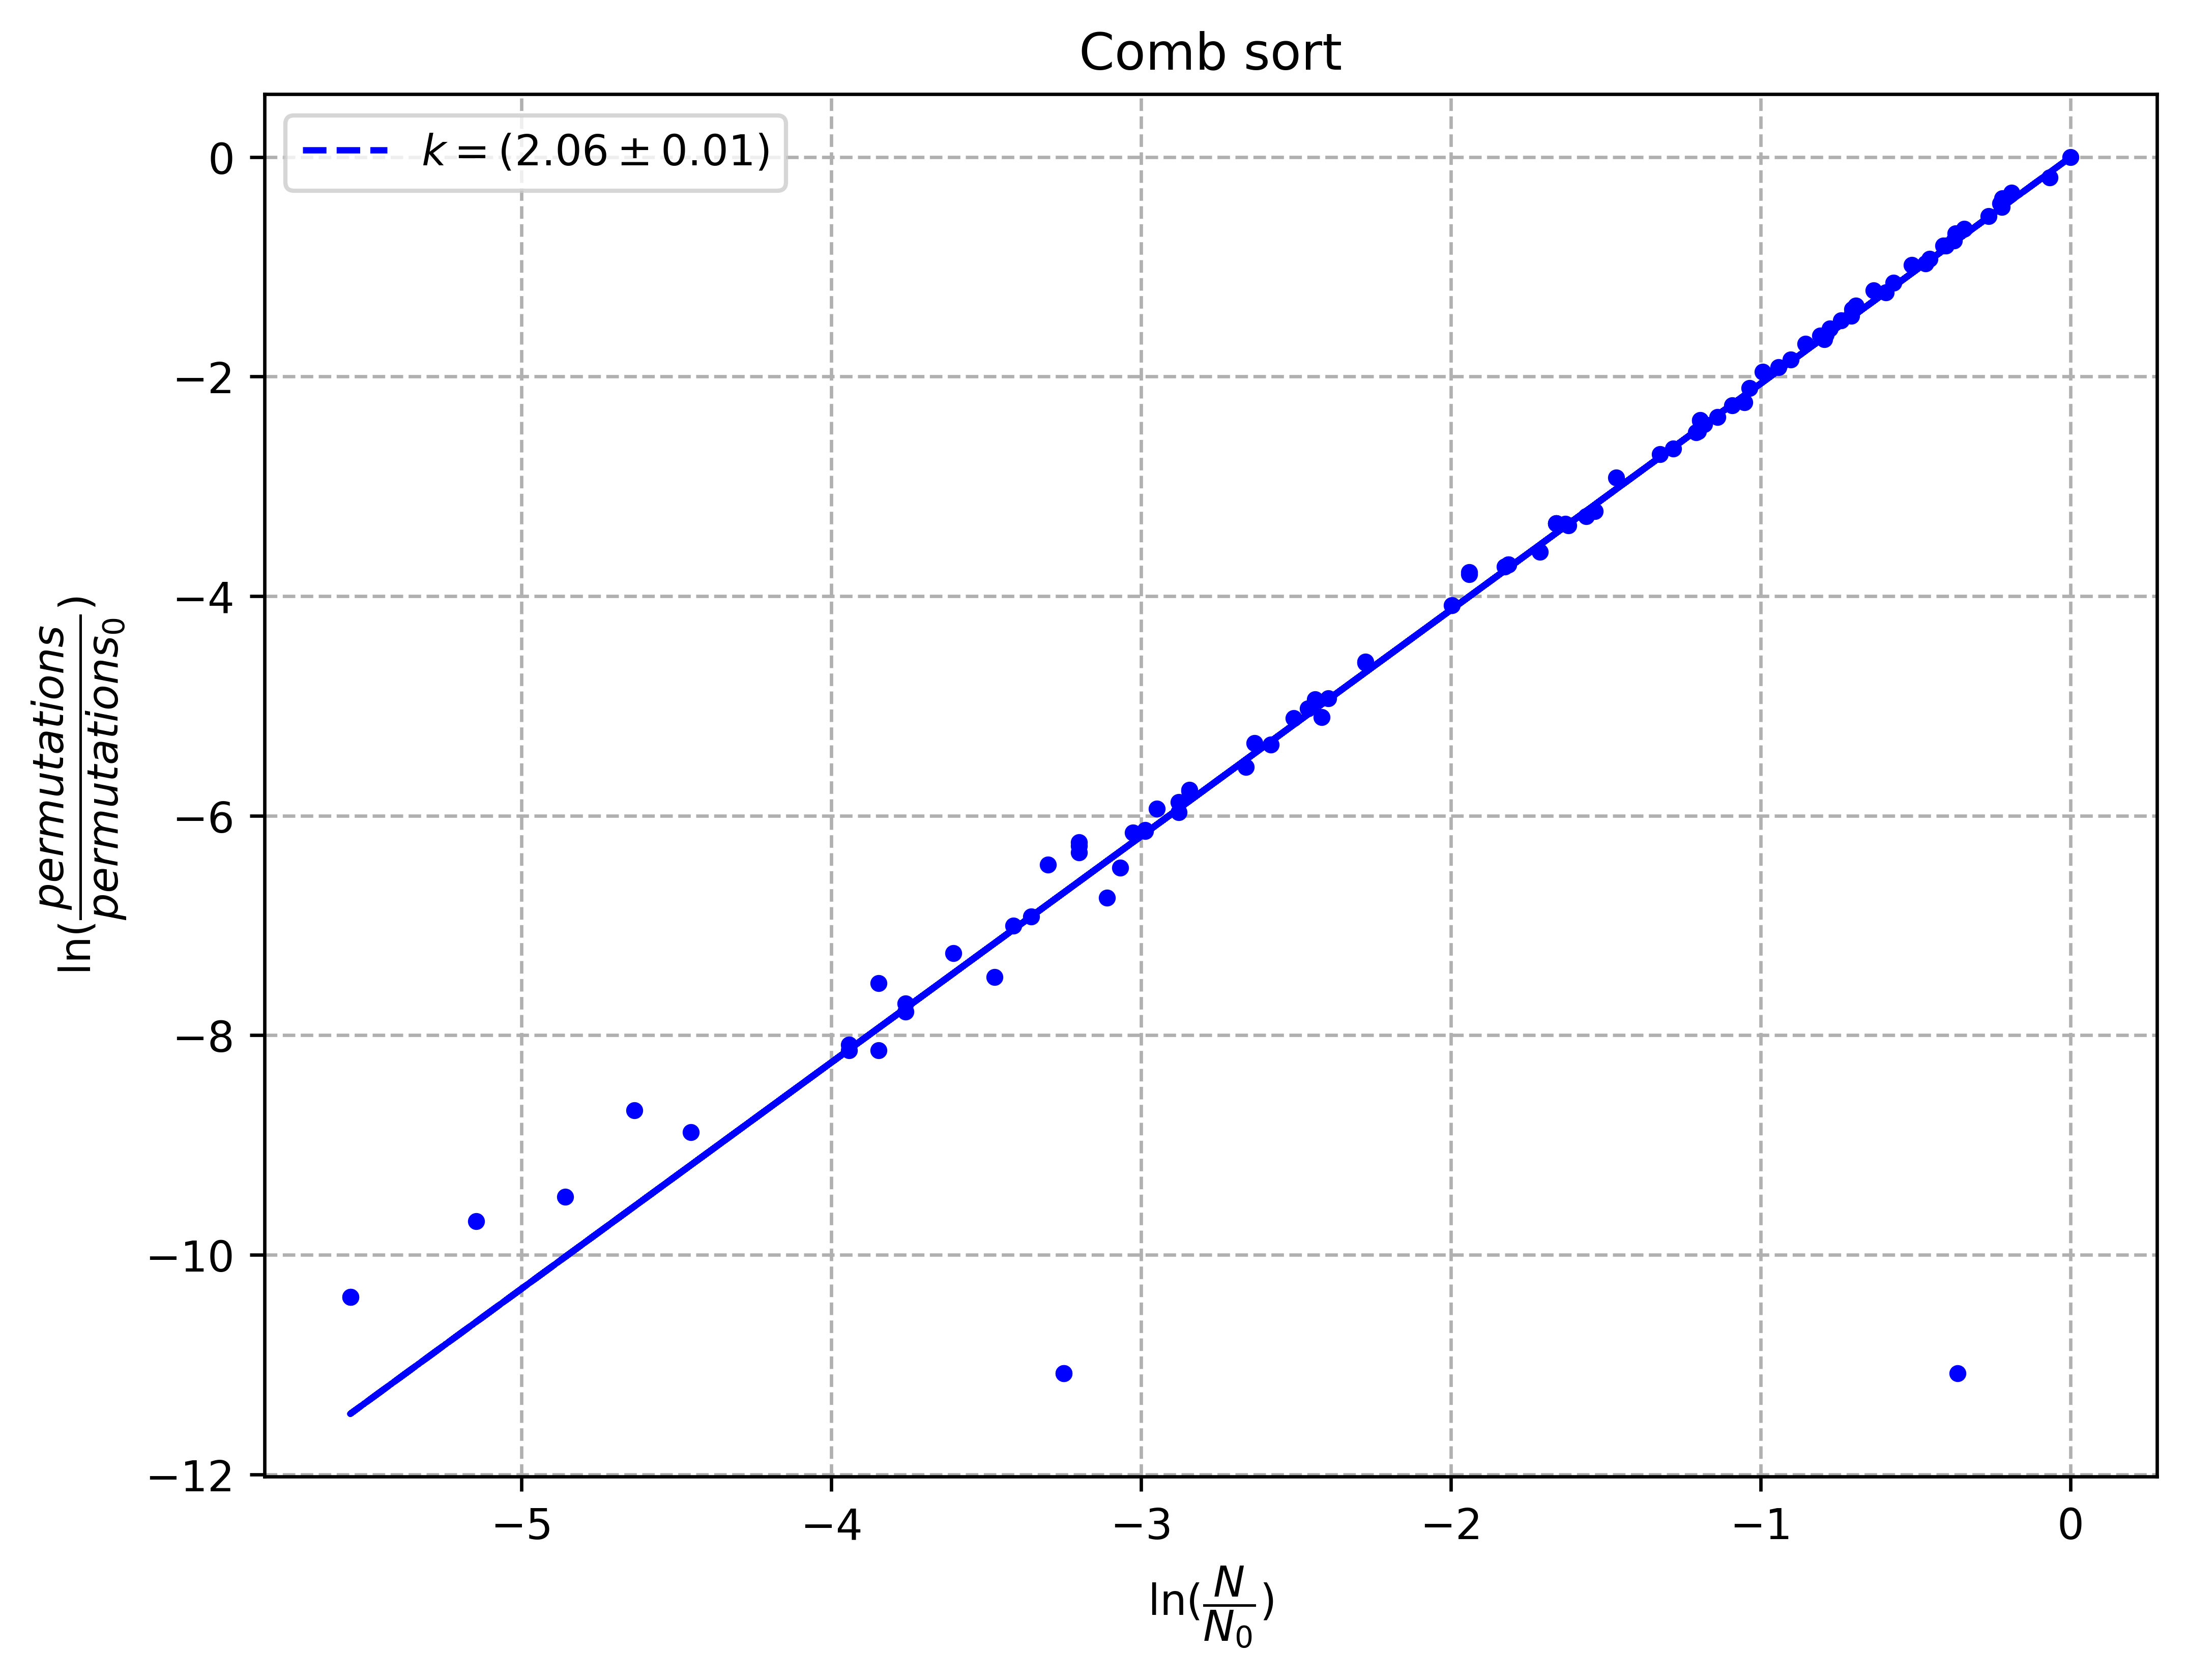

In [46]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Comb sort")
plt.xlabel("$\ln(\dfrac{N}{N_0})$") # подписи к осям
plt.ylabel("$\ln(\dfrac{permutations}{permutations_0})$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab1["log_N"] = np.log(lab1["N"] / max(lab1["N"])) 
lab1["log_permutations"] = np.log(lab1["permutations"] / max(lab1["permutations"]))
k_permutations, sigma_k_permutations = lsm0(lab1["log_N"], lab1["log_permutations"])

plt.plot(lab1["log_N"], lab1["log_permutations"], 'b.', label="")
plt.plot(lab1["log_N"], k_permutations*lab1["log_N"],'b--', 
         label=r"$k = (%.2f \pm %.2f)$" % (k_permutations, sigma_k_permutations))

plt.legend()
plt.show()

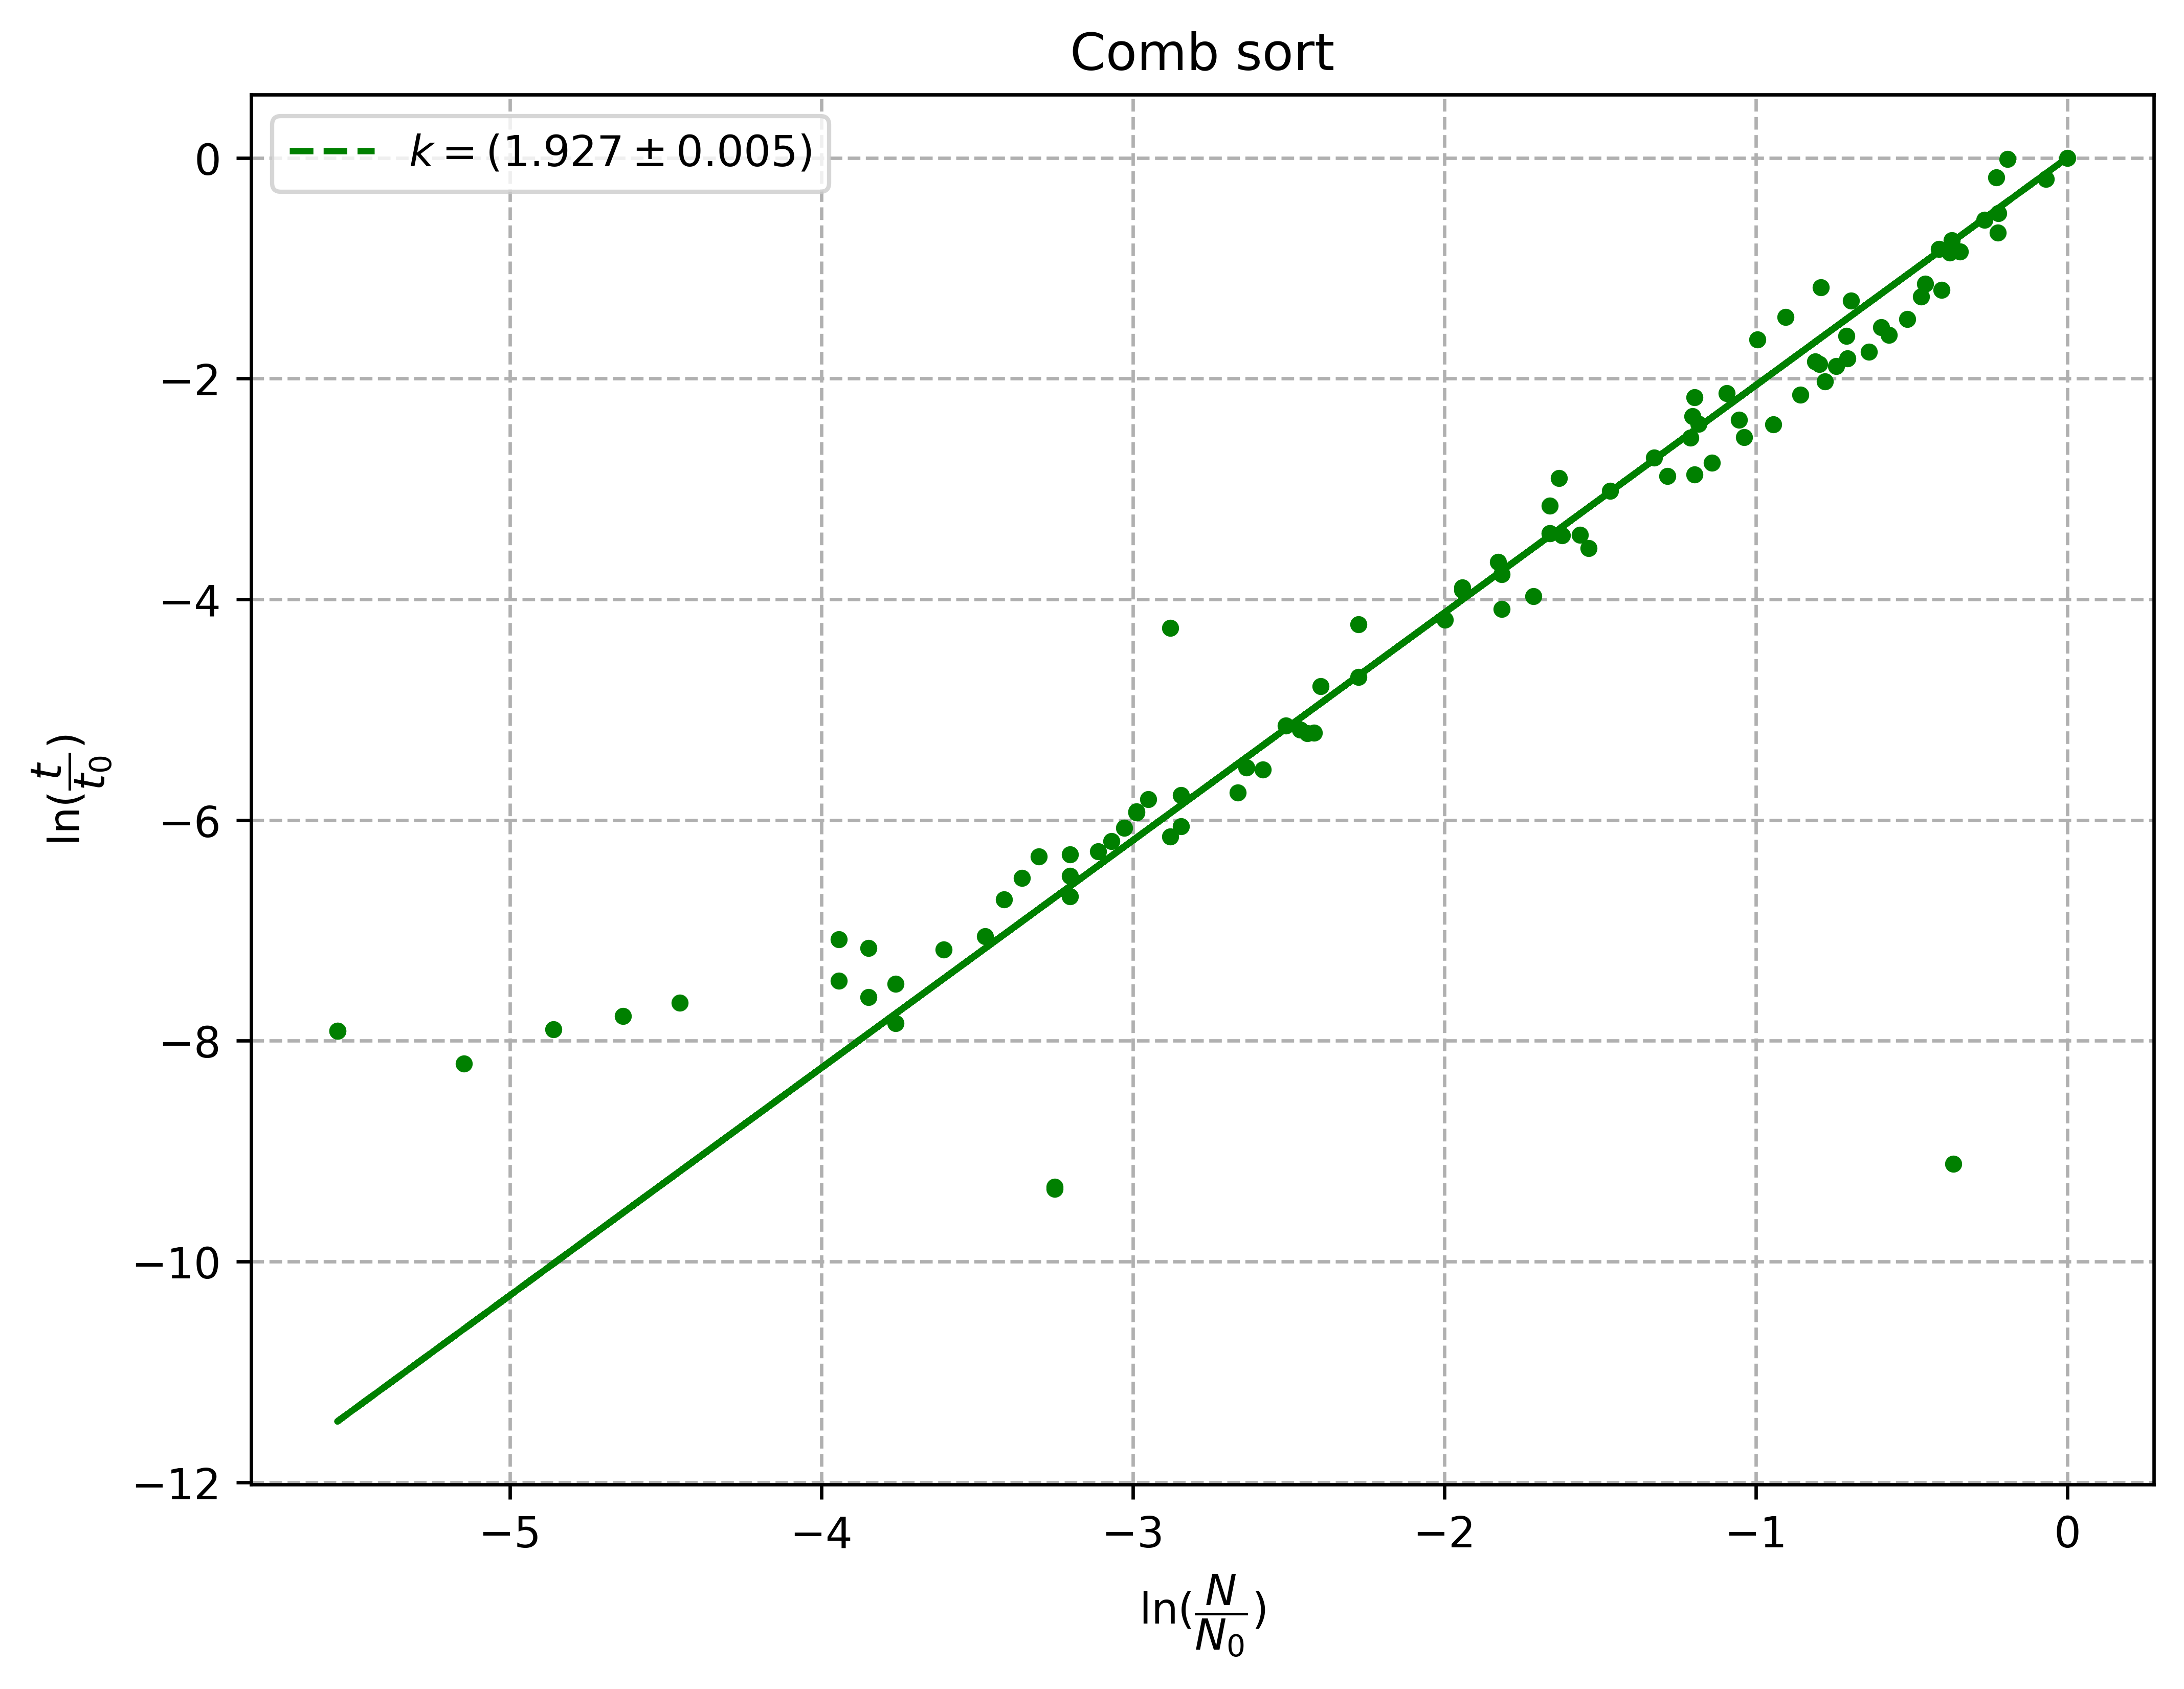

In [65]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Comb sort")
plt.xlabel("$\ln(\dfrac{N}{N_0})$") # подписи к осям
plt.ylabel("$\ln(\dfrac{t}{t_0})$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab1["log_time"] = np.log(lab1["time"] / max(lab1["time"]))
k_time, sigma_k_time = lsm0(lab1["log_N"], lab1["log_time"])

plt.plot(lab1["log_N"], lab1["log_time"], 'g.')
plt.plot(lab1["log_N"], k*lab1["log_N"],'g--', label=r"$k = (%.3f \pm %.3f)$" % (k_time, sigma_k_time))

plt.legend()
plt.show()

In [33]:
lab2 = pd.read_excel("shell.xlsx")
lab2

,N,permutations1,time11,time12,time13,time14,time15,permutations2,time21,time22,time23,time24,time25,permutations3,time31,time32,time33,time34,time35
0,10,7,0.000002,0.000001,0.000001,0.000001,9.000000e-07,4,0.000004,0.000004,0.000005,0.000004,0.000003,7,0.000002,0.000001,0.000002,0.000002,0.000002
1,2009,19161,0.000571,0.000400,0.000571,0.000354,3.781000e-04,19372,0.000410,0.000543,0.001754,0.000304,0.000336,17018,0.001207,0.000439,0.000577,0.001910,0.000578
2,4008,43140,0.001386,0.000956,0.001295,0.001008,8.375000e-04,54473,0.001061,0.001366,0.001340,0.001118,0.000775,44466,0.001679,0.001096,0.001358,0.003530,0.001392
3,6007,73534,0.002226,0.001685,0.002253,0.001368,1.316900e-03,83731,0.001607,0.002002,0.002070,0.001268,0.001165,71968,0.002756,0.001584,0.002199,0.003192,0.002557
4,8006,100319,0.002951,0.002107,0.003609,0.001806,6.966800e-03,131012,0.002966,0.003238,0.005713,0.004006,0.001765,101708,0.005088,0.002772,0.003303,0.006332,0.003477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,191914,5779415,0.205427,0.143425,0.121546,0.084641,8.337510e-02,7802866,0.096943,0.106878,0.091940,0.103103,0.091315,6676484,0.339897,0.345227,0.118046,0.113310,0.229007
97,193913,5721801,0.158537,0.131784,0.103059,0.083526,8.456960e-02,7003489,0.084990,0.103318,0.085339,0.096639,0.093393,6106586,0.703556,0.455182,0.107931,0.108558,0.199901
98,195912,5721767,0.147763,0.312525,0.095230,0.083845,8.789840e-02,8528494,0.100465,0.109149,0.102507,0.120217,0.128895,7095004,1.187440,0.654467,0.120694,0.115199,0.266948
99,197911,7080900,0.140565,0.293295,0.109049,0.095889,9.704610e-02,7786260,0.103894,0.091419,0.106373,0.105060,0.104804,6619212,1.319260,0.382298,0.127301,0.116765,0.238145


In [35]:
lab2["time1"] = lab2[['time11', 'time12', 'time13', 'time14', 'time15']].mean(axis=1)
lab2["time2"] = lab2[['time21', 'time22', 'time23', 'time24', 'time25']].mean(axis=1)
lab2["time3"] = lab2[['time31', 'time32', 'time33', 'time34', 'time35']].mean(axis=1)
lab2

,N,permutations1,time11,time12,time13,time14,time15,permutations2,time21,time22,...,time25,permutations3,time31,time32,time33,time34,time35,time1,time2,time3
0,10,7,0.000002,0.000001,0.000001,0.000001,9.000000e-07,4,0.000004,0.000004,...,0.000003,7,0.000002,0.000001,0.000002,0.000002,0.000002,0.000001,0.000004,0.000002
1,2009,19161,0.000571,0.000400,0.000571,0.000354,3.781000e-04,19372,0.000410,0.000543,...,0.000336,17018,0.001207,0.000439,0.000577,0.001910,0.000578,0.000455,0.000669,0.000942
2,4008,43140,0.001386,0.000956,0.001295,0.001008,8.375000e-04,54473,0.001061,0.001366,...,0.000775,44466,0.001679,0.001096,0.001358,0.003530,0.001392,0.001096,0.001132,0.001811
3,6007,73534,0.002226,0.001685,0.002253,0.001368,1.316900e-03,83731,0.001607,0.002002,...,0.001165,71968,0.002756,0.001584,0.002199,0.003192,0.002557,0.001770,0.001622,0.002457
4,8006,100319,0.002951,0.002107,0.003609,0.001806,6.966800e-03,131012,0.002966,0.003238,...,0.001765,101708,0.005088,0.002772,0.003303,0.006332,0.003477,0.003488,0.003538,0.004195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,191914,5779415,0.205427,0.143425,0.121546,0.084641,8.337510e-02,7802866,0.096943,0.106878,...,0.091315,6676484,0.339897,0.345227,0.118046,0.113310,0.229007,0.127683,0.098036,0.229097
97,193913,5721801,0.158537,0.131784,0.103059,0.083526,8.456960e-02,7003489,0.084990,0.103318,...,0.093393,6106586,0.703556,0.455182,0.107931,0.108558,0.199901,0.112295,0.092736,0.315026
98,195912,5721767,0.147763,0.312525,0.095230,0.083845,8.789840e-02,8528494,0.100465,0.109149,...,0.128895,7095004,1.187440,0.654467,0.120694,0.115199,0.266948,0.145452,0.112247,0.468950
99,197911,7080900,0.140565,0.293295,0.109049,0.095889,9.704610e-02,7786260,0.103894,0.091419,...,0.104804,6619212,1.319260,0.382298,0.127301,0.116765,0.238145,0.147169,0.102310,0.436754


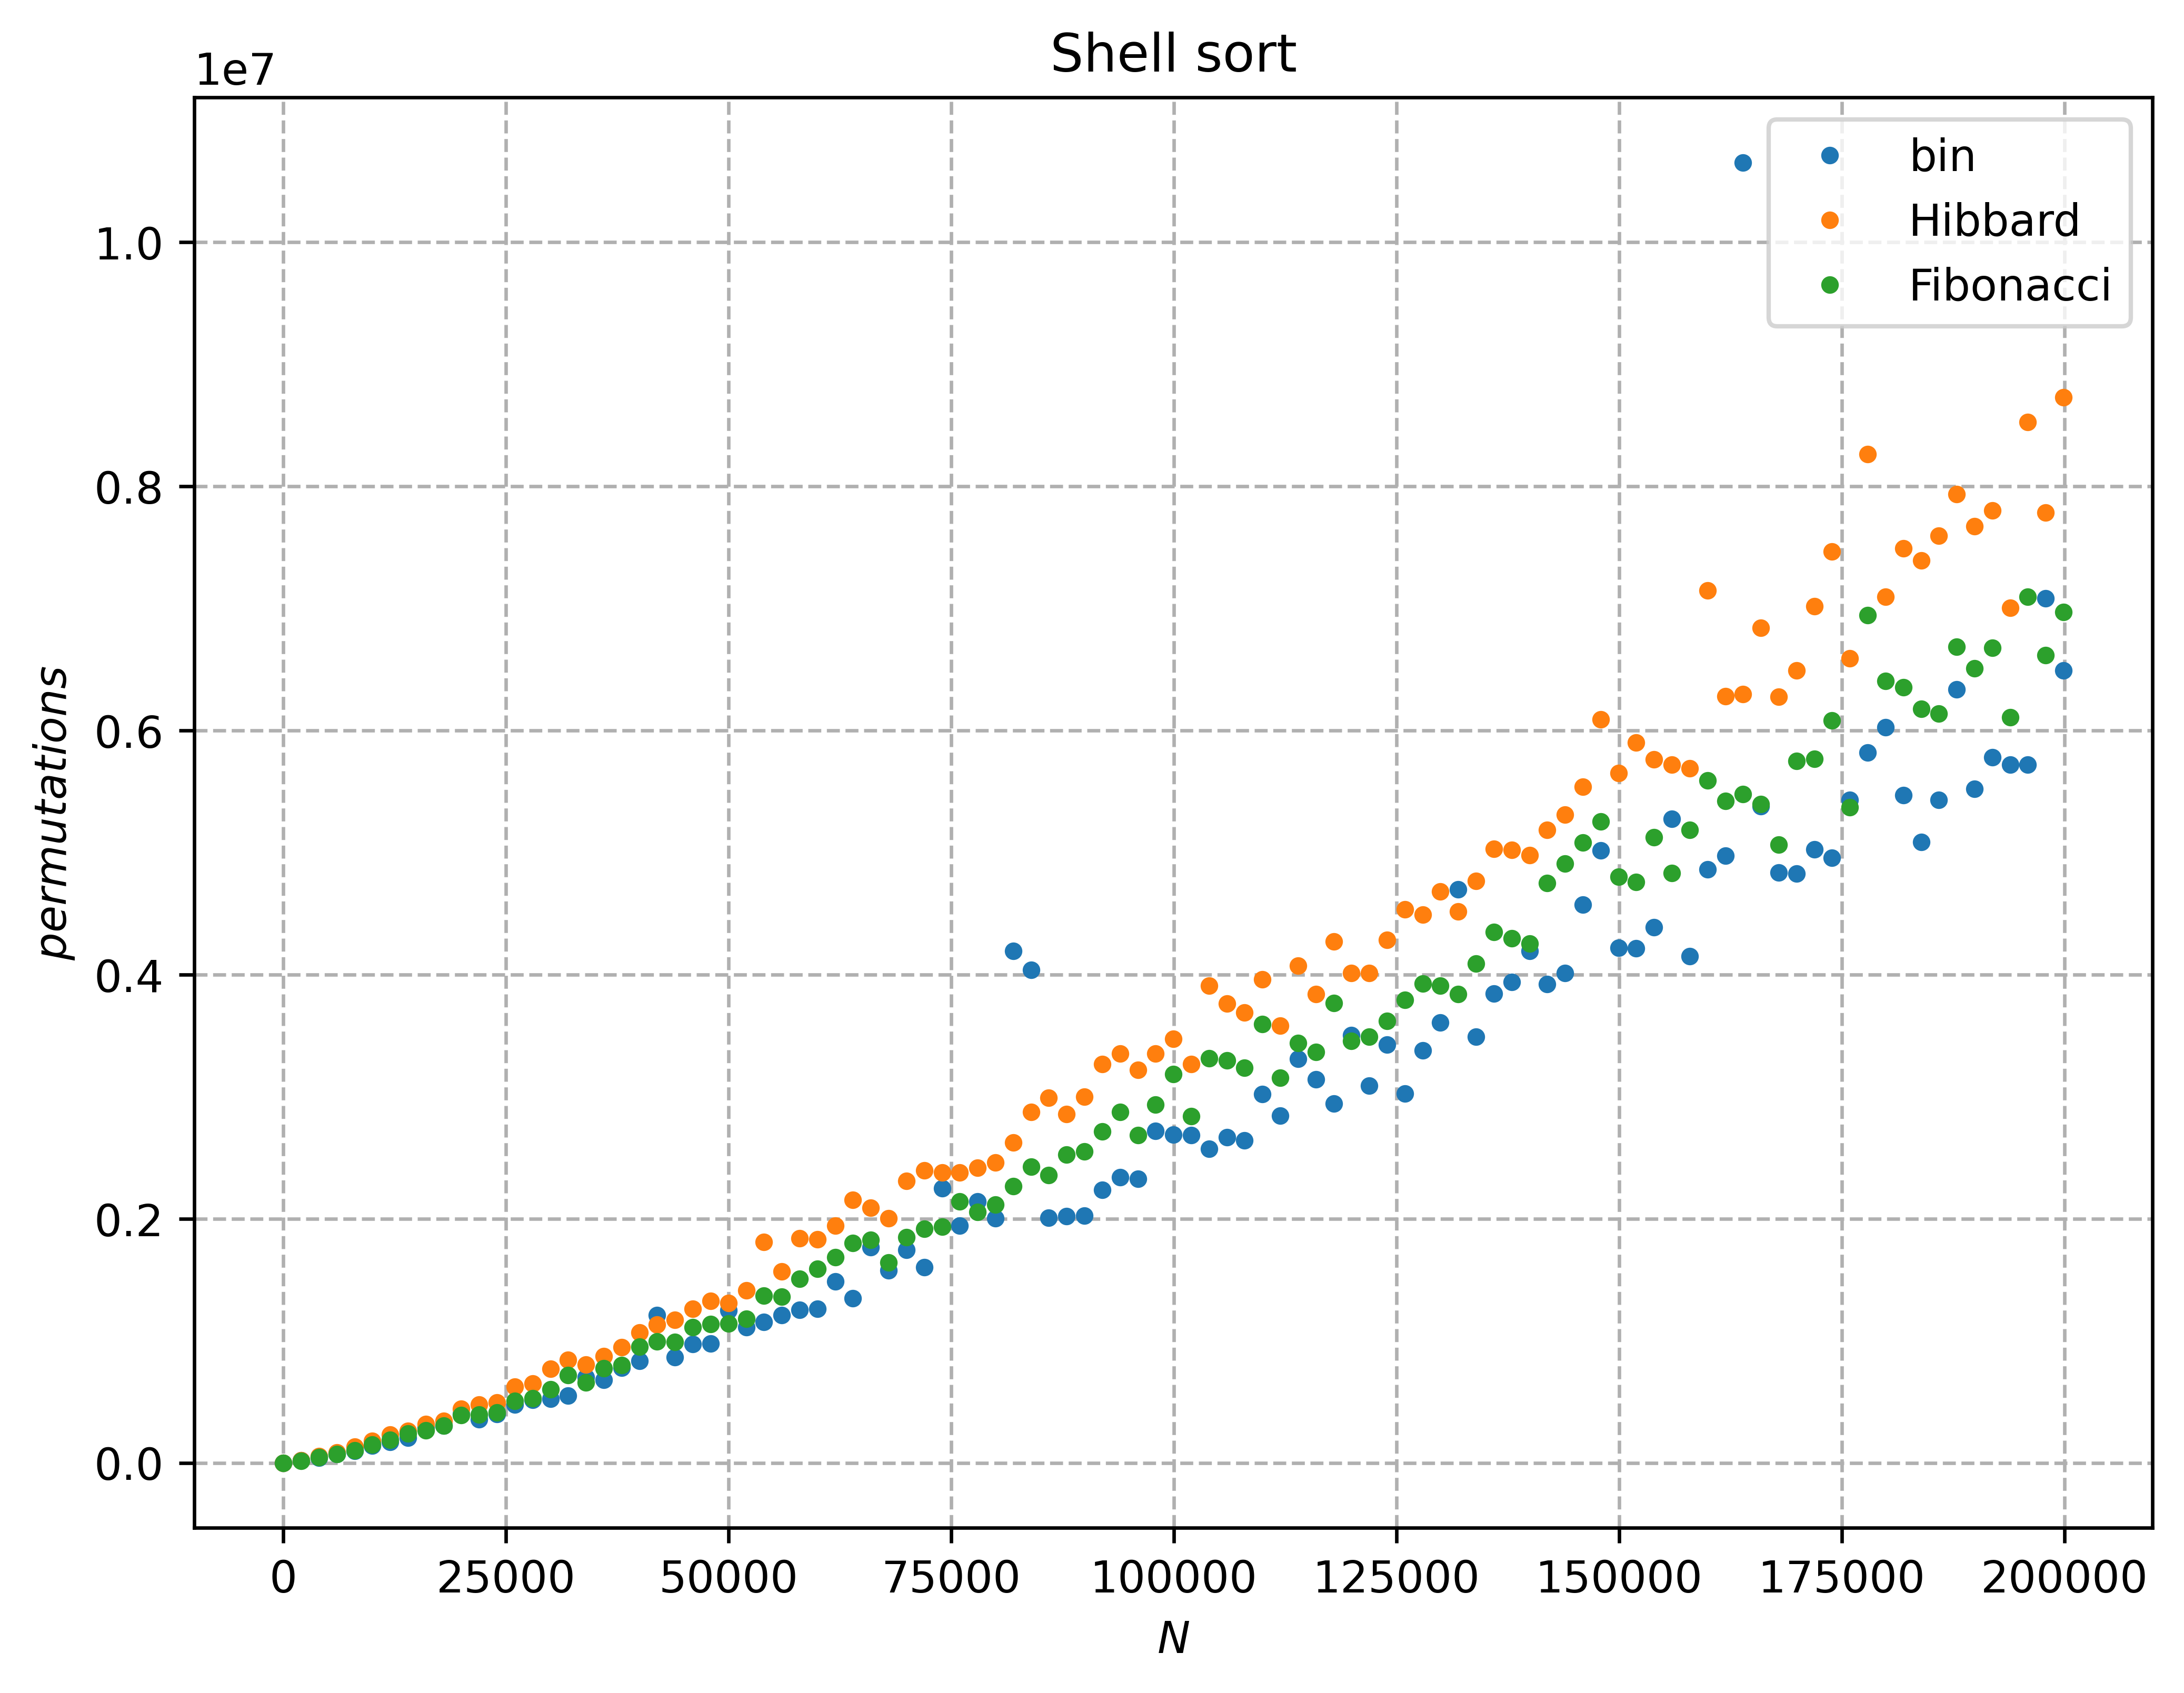

In [75]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Shell sort")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$permutations$")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], lab2["permutations1"], '.', label = "bin")
plt.plot(lab2["N"], lab2["permutations2"], '.', label = "Hibbard")
plt.plot(lab2["N"], lab2["permutations3"], '.', label = "Fibonacci")

plt.legend()
plt.show()

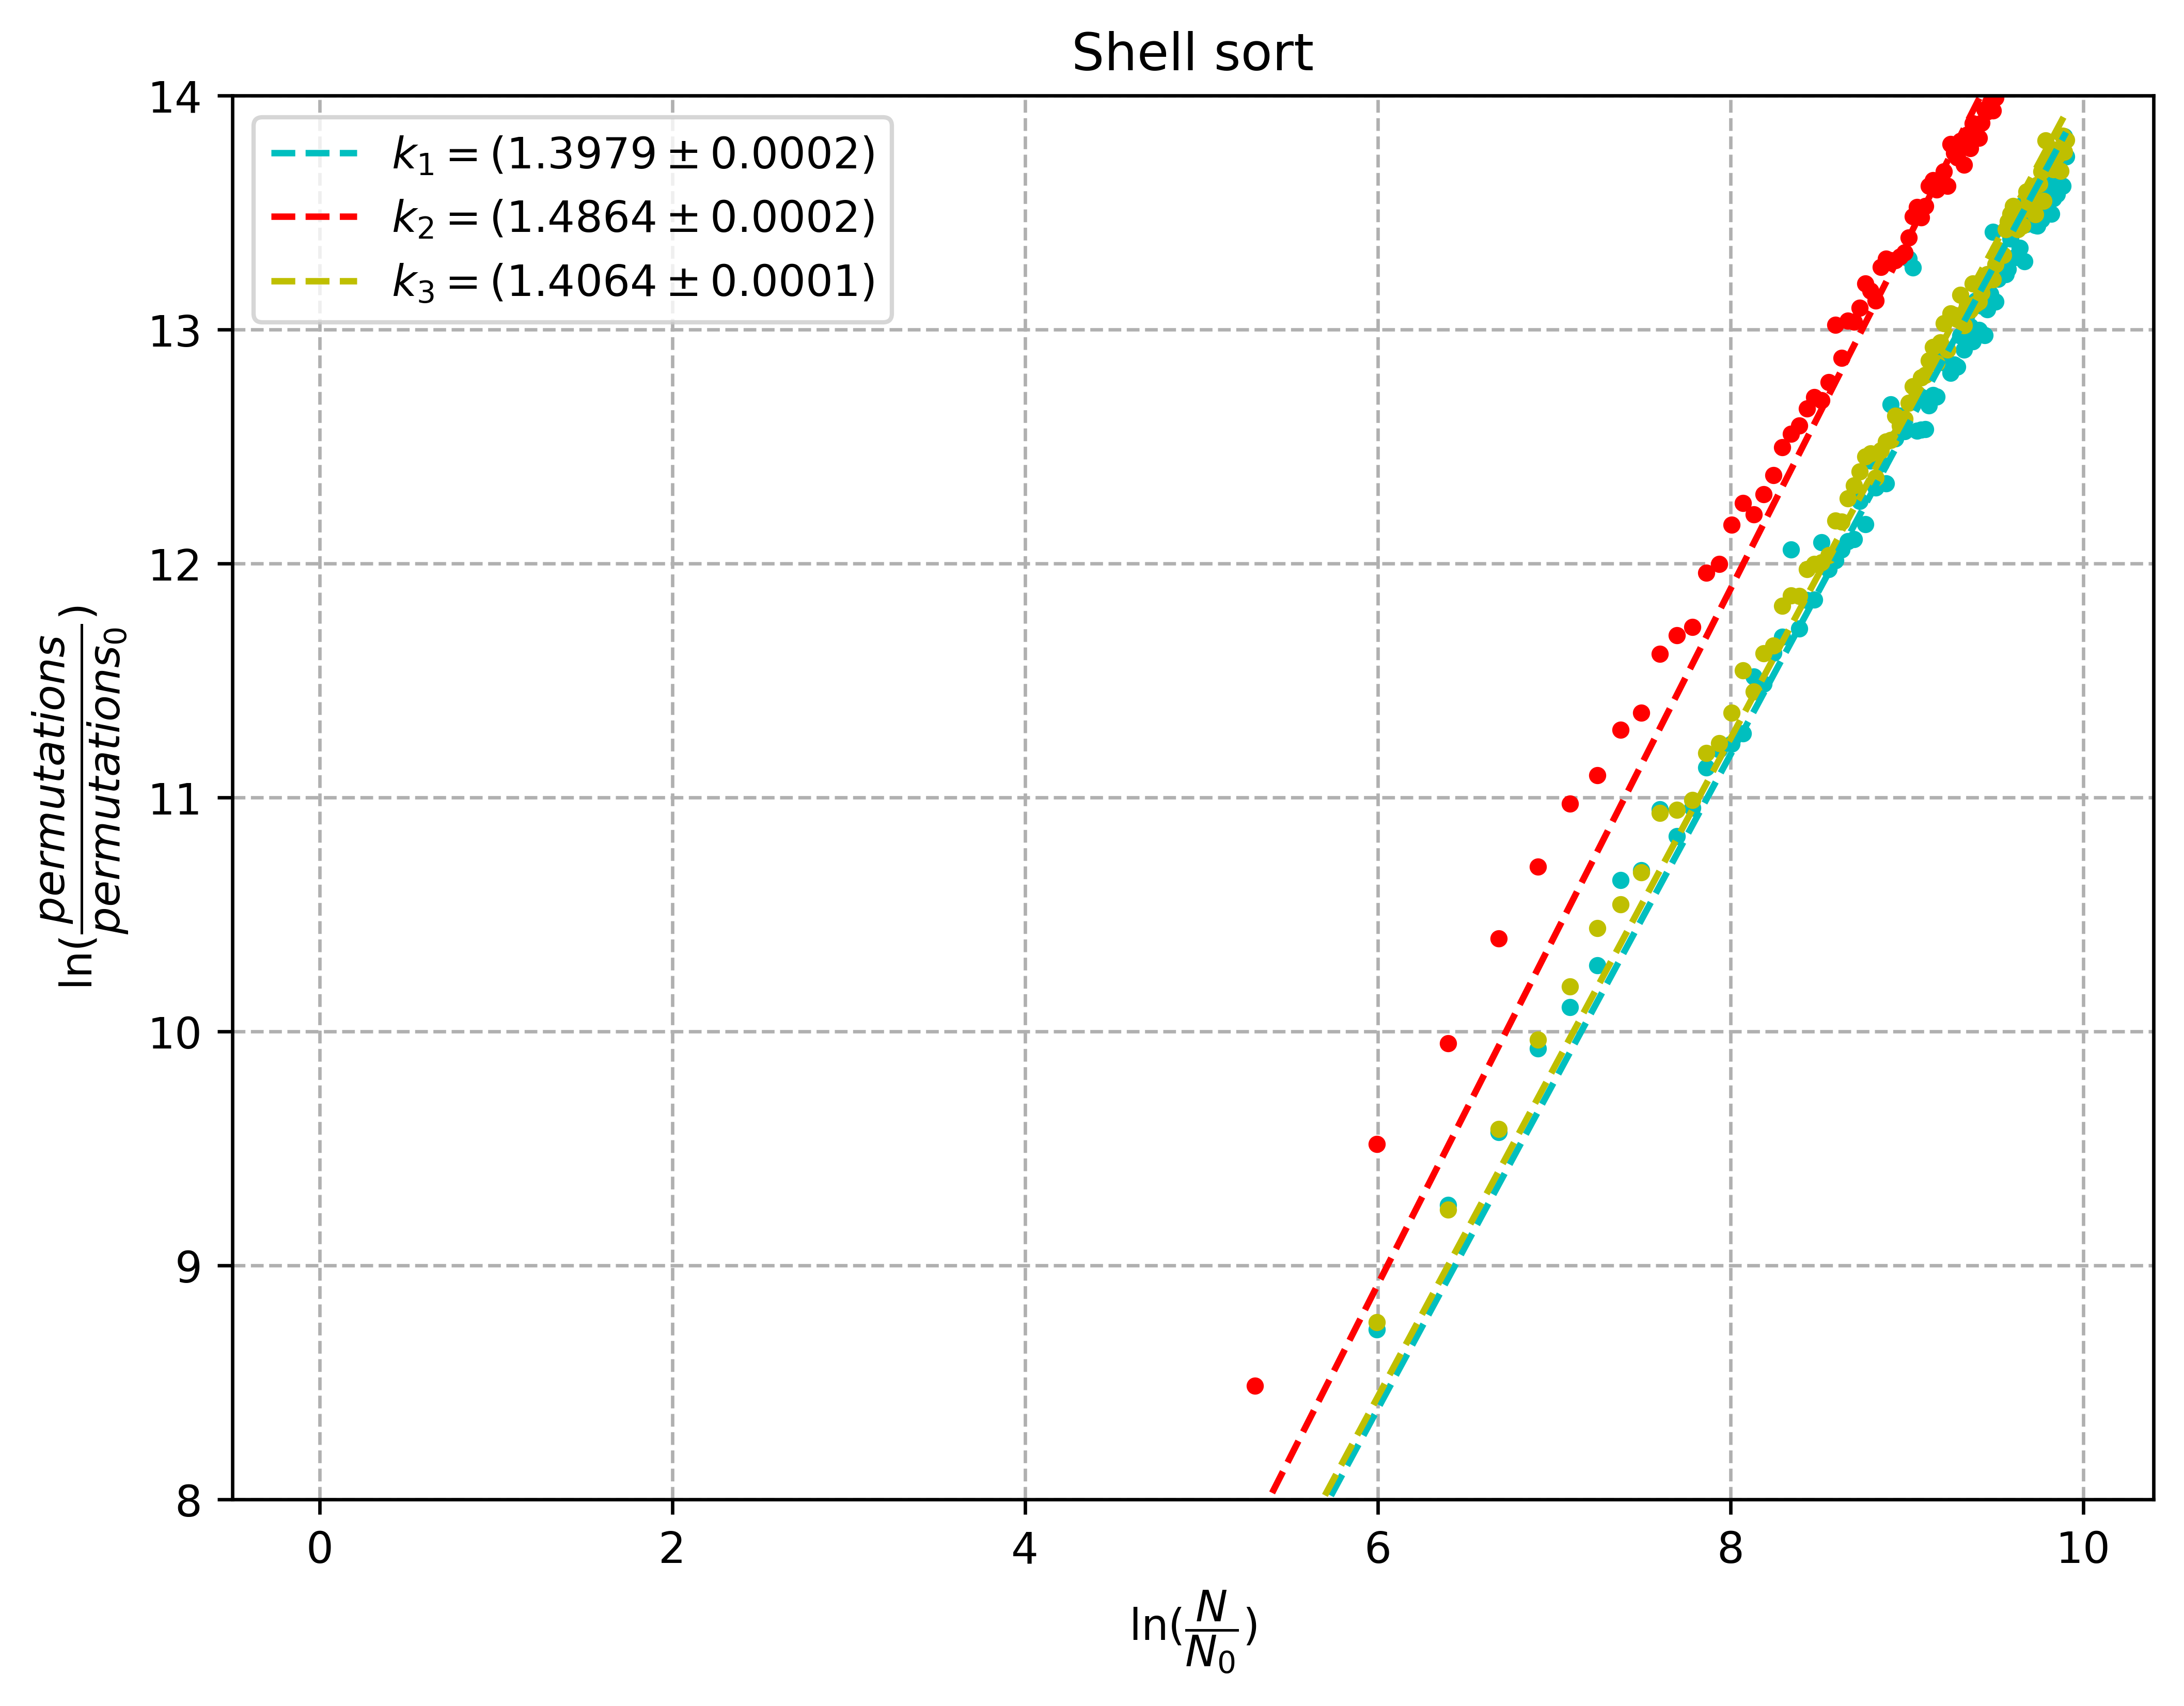

In [72]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Shell sort")
plt.xlabel("$\ln(\dfrac{N}{N_0})$") # подписи к осям
plt.ylabel("$\ln(\dfrac{permutations}{permutations_0})$")
plt.ylim([8, 14])
plt.grid(True, linestyle="--") # пунктирная сетка

lab2["log_N"] = np.log(lab2["N"] / min(lab2["N"]))
lab2["log_permutations1"] = np.log(lab2["permutations1"] / min(lab2["permutations1"]))
lab2["log_permutations2"] = np.log(lab2["permutations2"] / min(lab2["permutations2"]))
lab2["log_permutations3"] = np.log(lab2["permutations3"] / min(lab2["permutations3"]))

k_permutations1, sigma_k_permutations1 = lsm0(lab2["log_N"], lab2["log_permutations1"])
k_permutations2, sigma_k_permutations2 = lsm0(lab2["log_N"], lab2["log_permutations2"])
k_permutations3, sigma_k_permutations3 = lsm0(lab2["log_N"], lab2["log_permutations3"])

plt.plot(lab2["log_N"], lab2["log_permutations1"], '.', color='c')
plt.plot(lab2["log_N"], lab2["log_permutations2"], '.', color='r')
plt.plot(lab2["log_N"], lab2["log_permutations3"], '.', color='y')

plt.plot(lab2["log_N"], k_permutations1*lab2["log_N"], 'c--', 
         label=r"$k_1 = (%.4f \pm %.4f)$" % (k_permutations1, sigma_k_permutations1))
plt.plot(lab2["log_N"], k_permutations2*lab2["log_N"], 'r--', 
         label=r"$k_2 = (%.4f \pm %.4f)$" % (k_permutations2, sigma_k_permutations2))
plt.plot(lab2["log_N"], k_permutations3*lab2["log_N"], 'y--', 
         label=r"$k_3 = (%.4f \pm %.4f)$" % (k_permutations3, sigma_k_permutations3))

plt.legend()
plt.show()

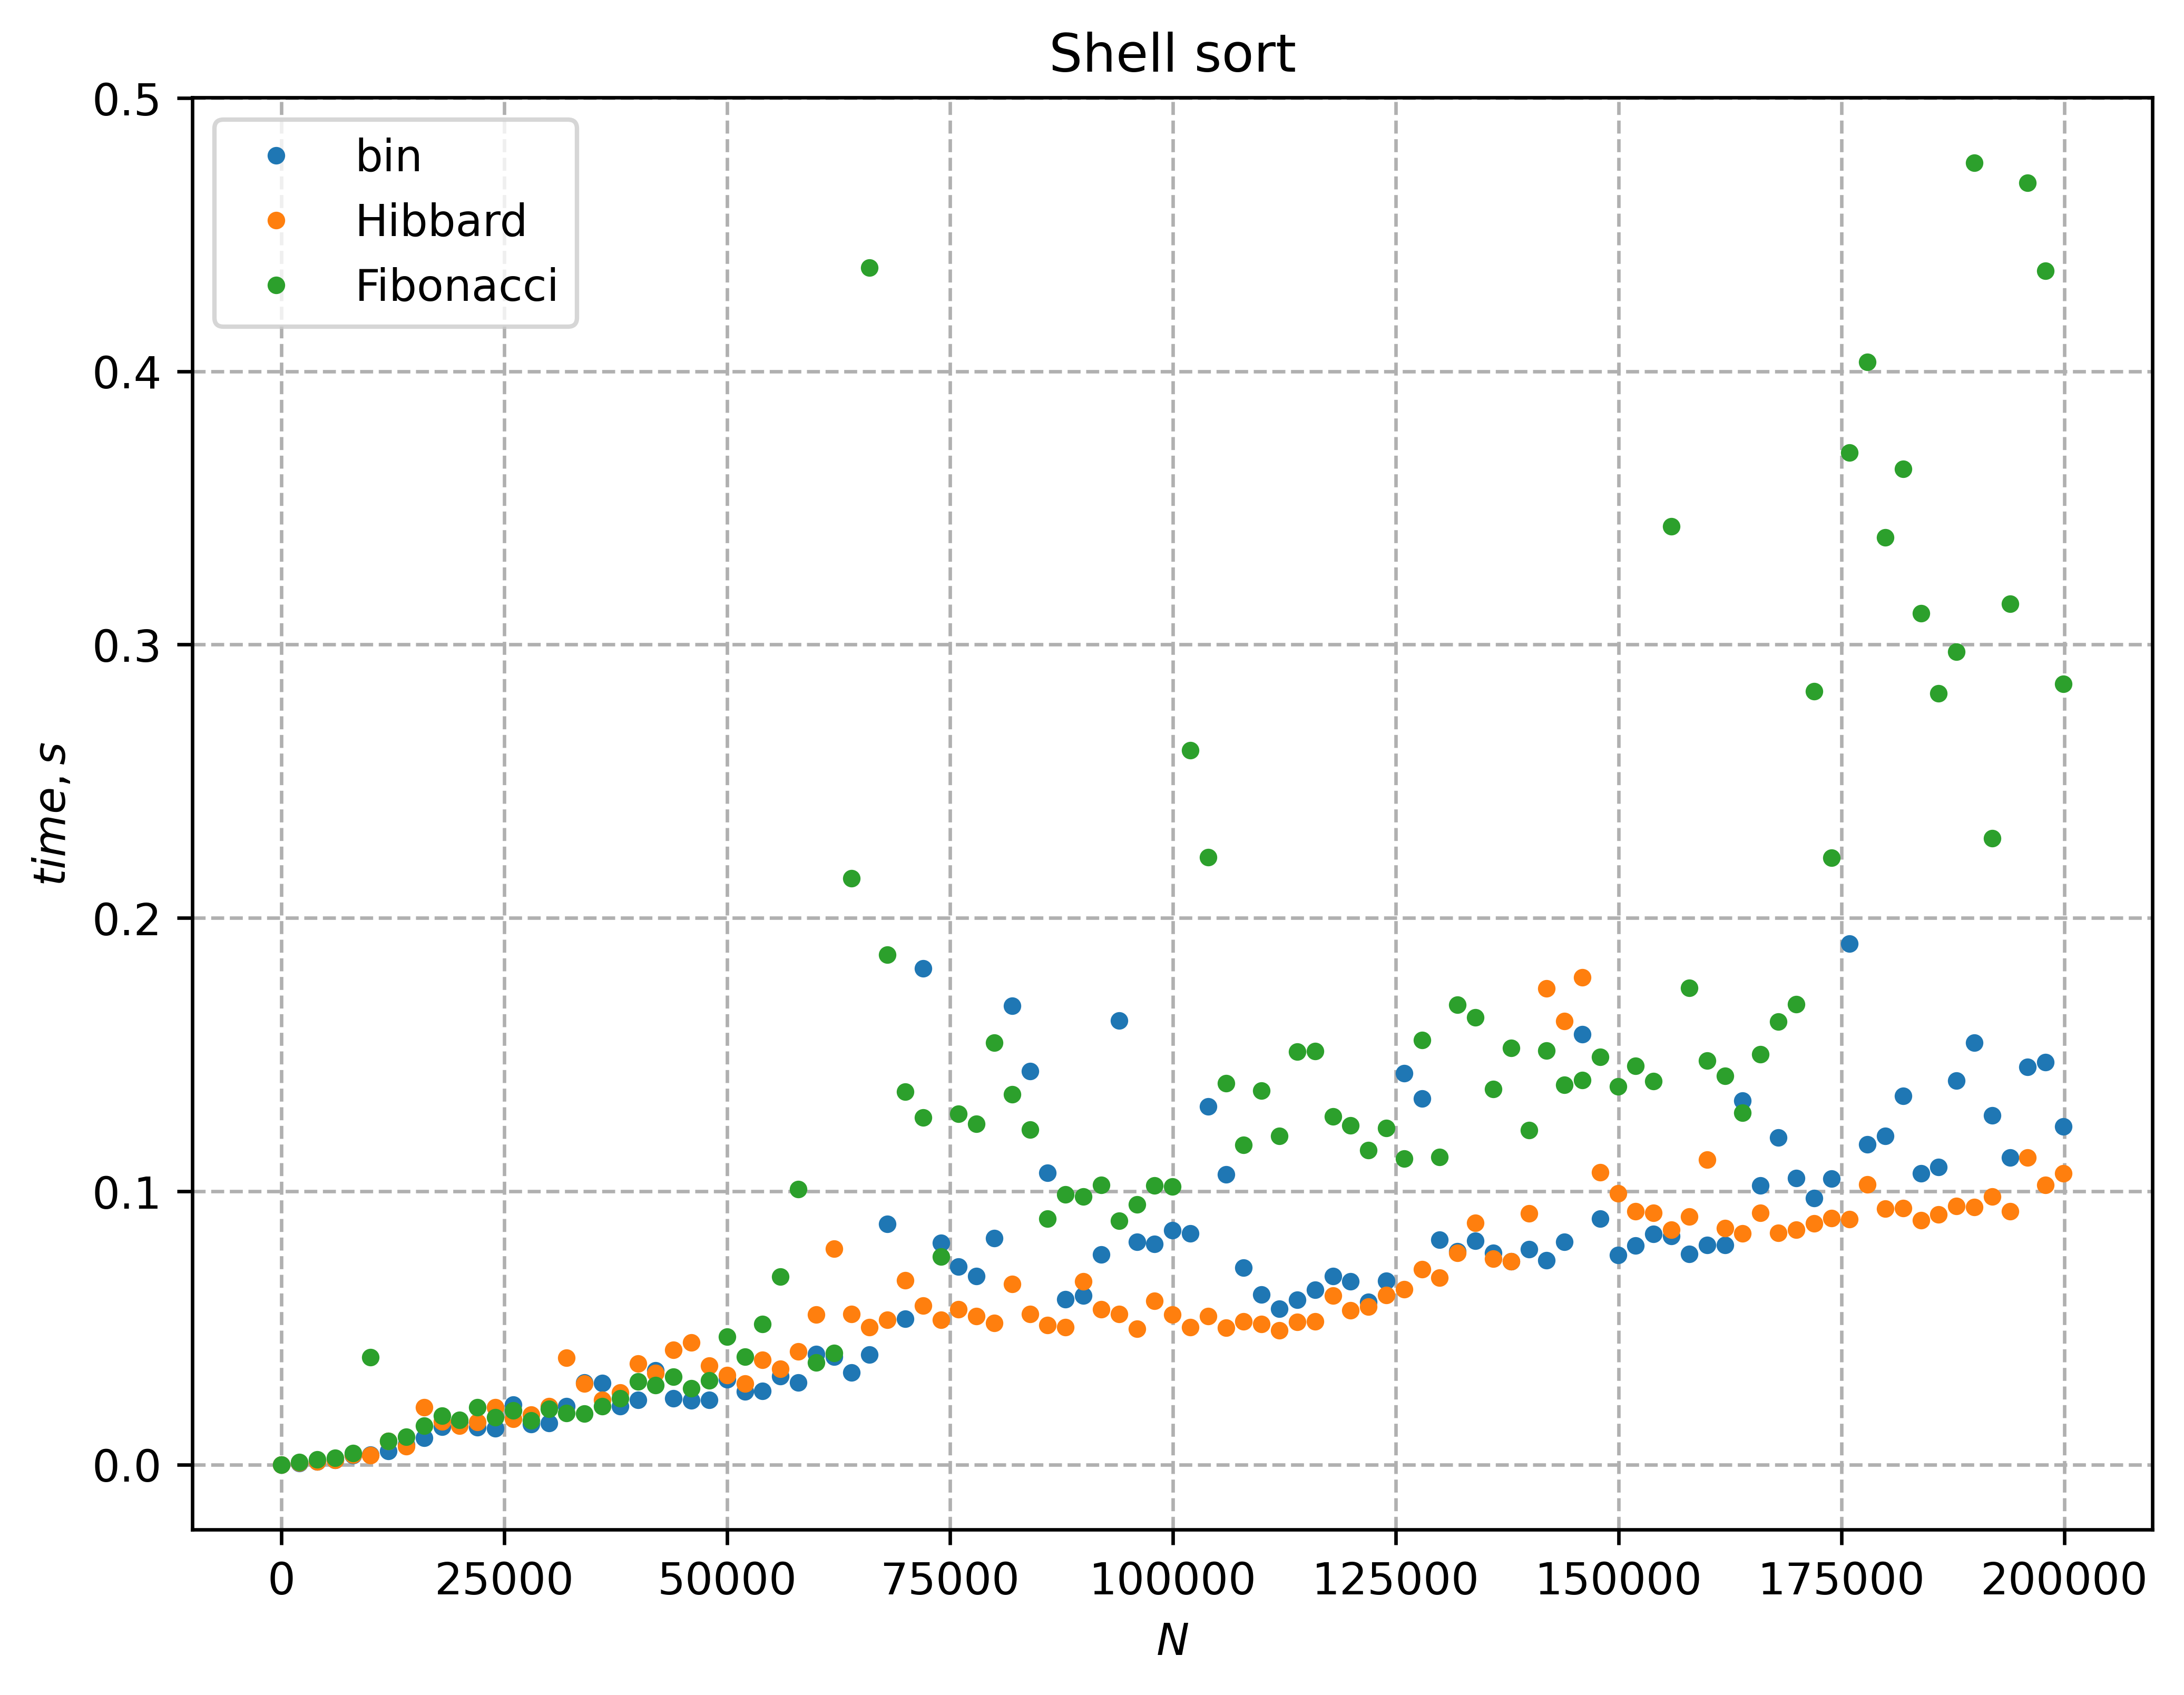

In [57]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Shell sort")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$time, s$")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], lab2["time1"], '.', label = "bin")
plt.plot(lab2["N"], lab2["time2"], '.', label = "Hibbard")
plt.plot(lab2["N"], lab2["time3"], '.', label = "Fibonacci")

plt.legend()
plt.show()

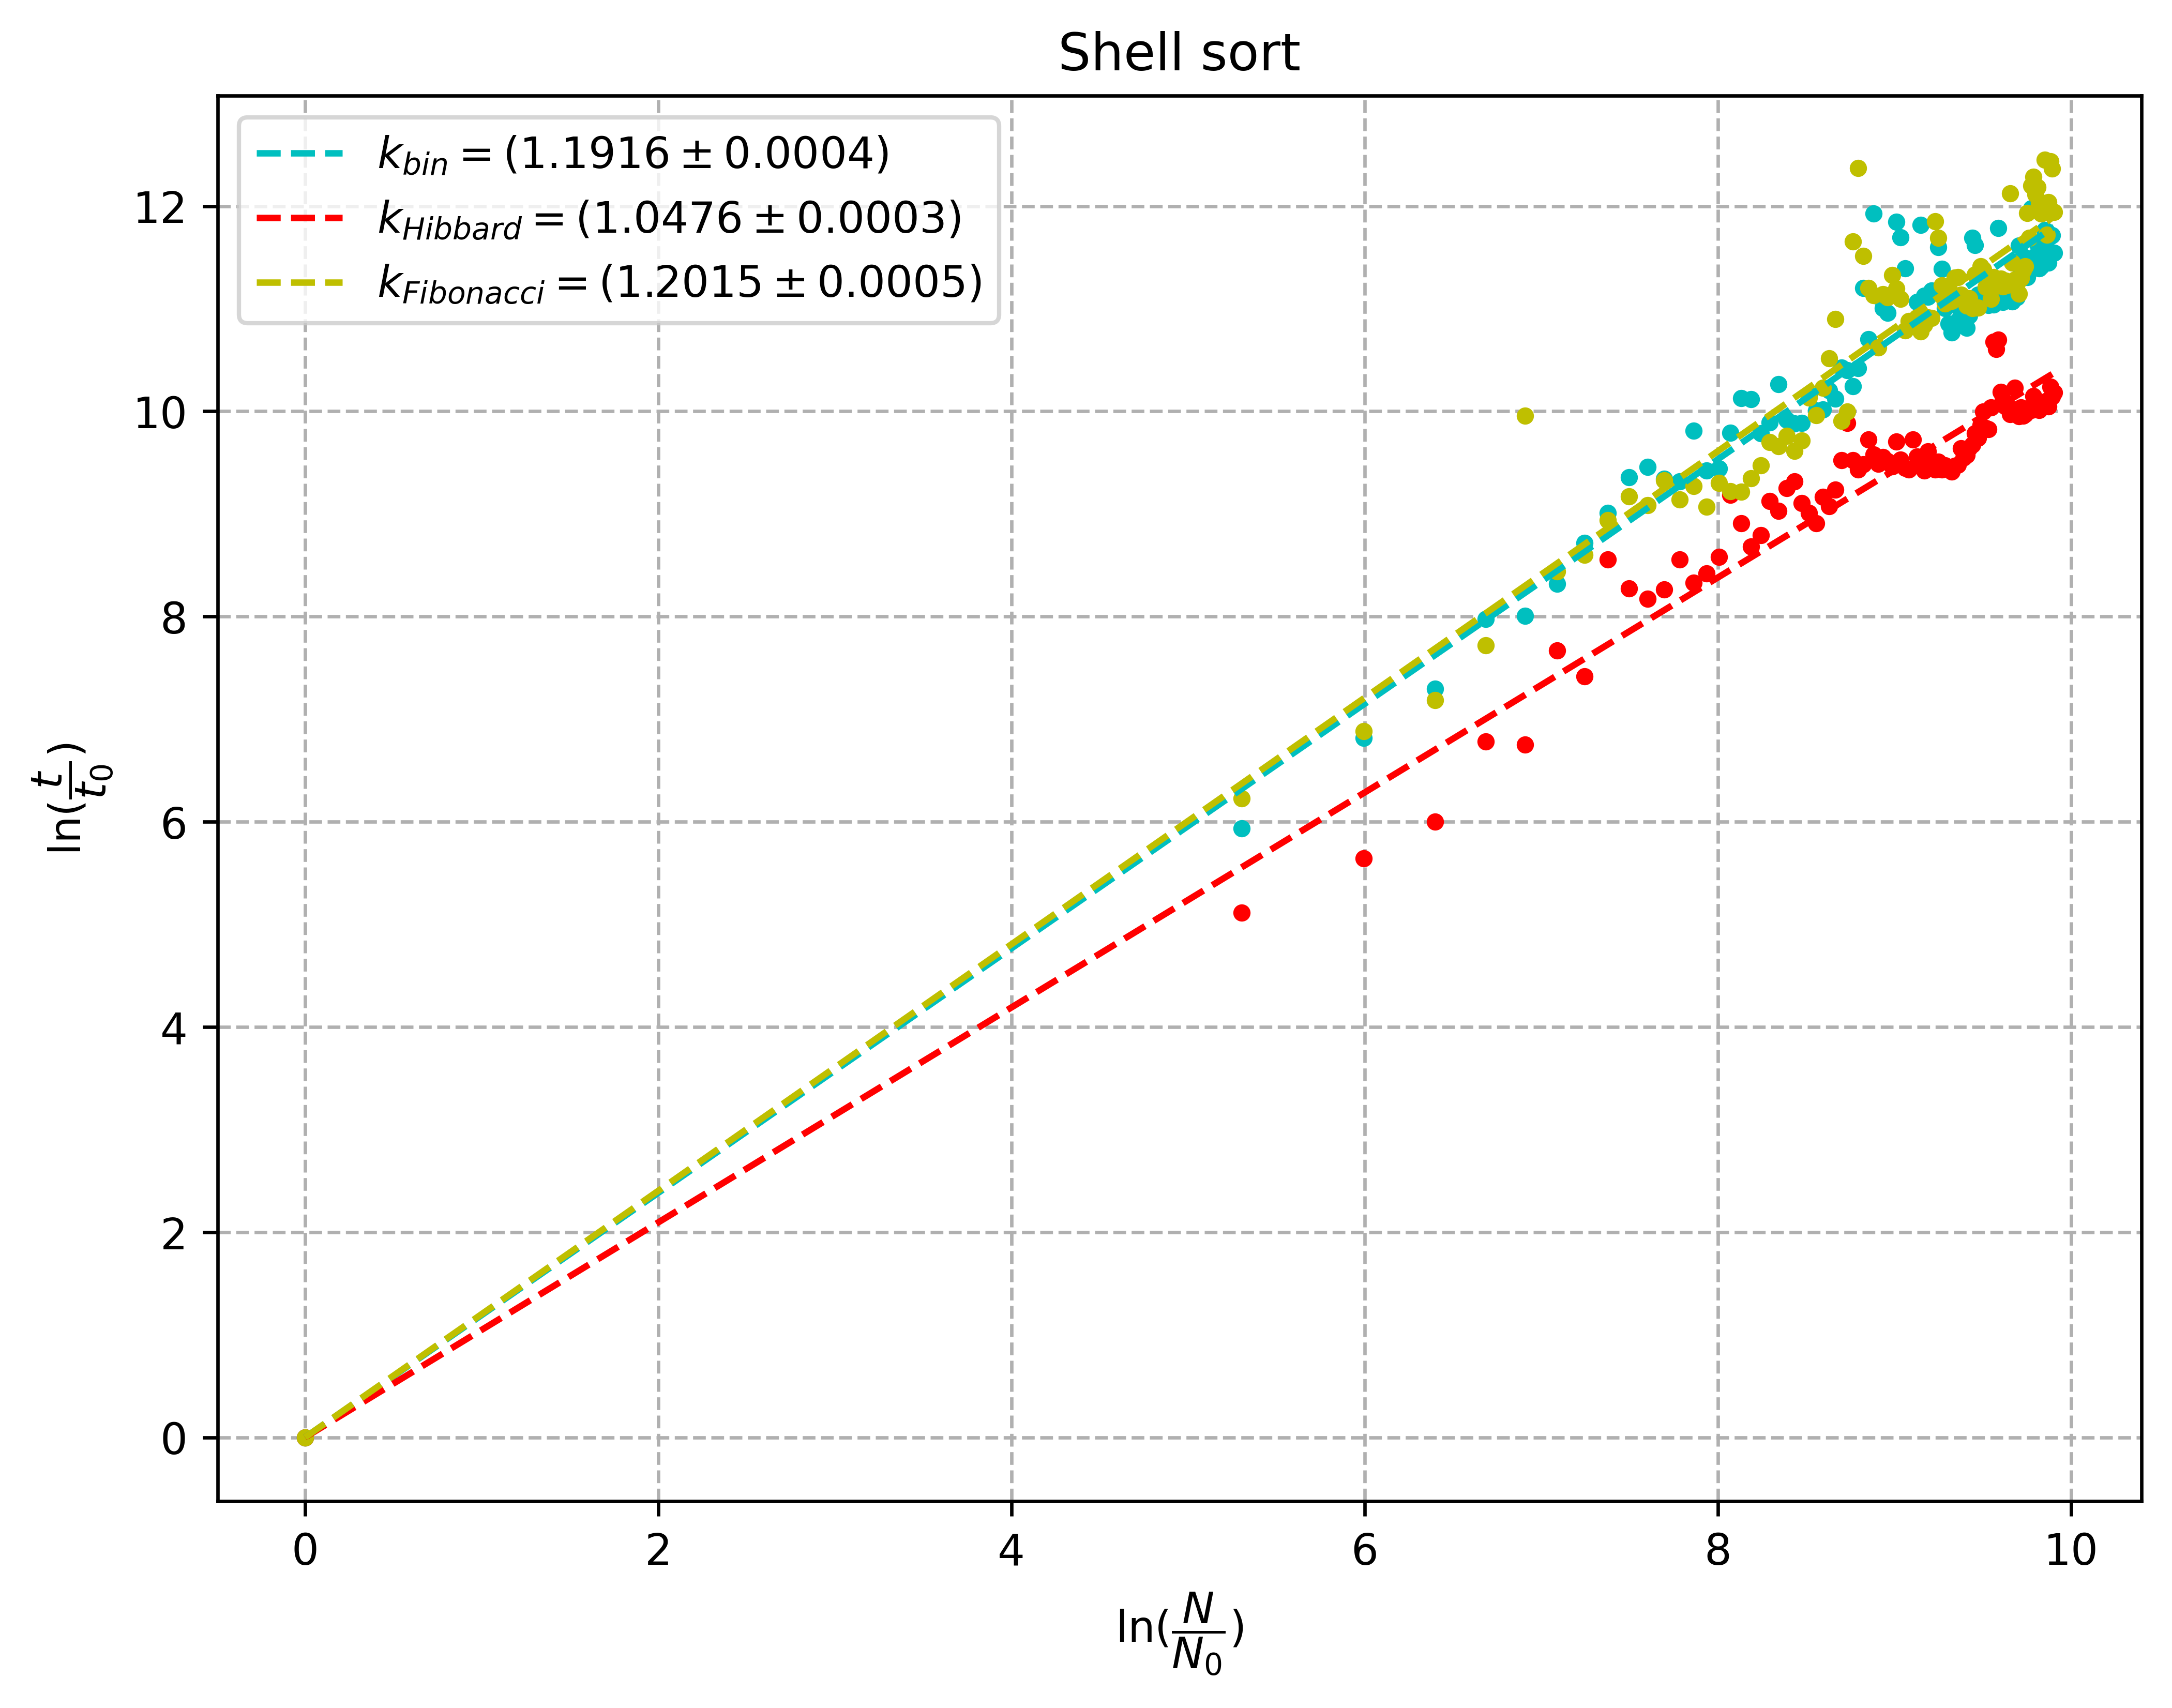

In [73]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Shell sort")
plt.xlabel("$\ln(\dfrac{N}{N_0})$") # подписи к осям
plt.ylabel("$\ln(\dfrac{t}{t_0})$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab2["log_time1"] = np.log(lab2["time1"] / min(lab2["time1"]))
lab2["log_time2"] = np.log(lab2["time2"] / min(lab2["time2"]))
lab2["log_time3"] = np.log(lab2["time3"] / min(lab2["time3"]))

k_time1, sigma_k_time1 = lsm0(lab2["log_N"], lab2["log_time1"])
k_time2, sigma_k_time2 = lsm0(lab2["log_N"], lab2["log_time2"])
k_time3, sigma_k_time3 = lsm0(lab2["log_N"], lab2["log_time3"])

plt.plot(lab2["log_N"], lab2["log_time1"], '.', color='c')
plt.plot(lab2["log_N"], lab2["log_time2"], '.', color='r')
plt.plot(lab2["log_N"], lab2["log_time3"], '.', color='y')

plt.plot(lab2["log_N"], k_time1*lab2["log_N"], 'c--', label=r"$k_{bin} = (%.4f \pm %.4f)$" % (k_time1, sigma_k_time1))
plt.plot(lab2["log_N"], k_time2*lab2["log_N"], 'r--', label=r"$k_{Hibbard} = (%.4f \pm %.4f)$" % (k_time2, sigma_k_time2))
plt.plot(lab2["log_N"], k_time3*lab2["log_N"], 'y--', label=r"$k_{Fibonacci} = (%.4f \pm %.4f)$" % (k_time3, sigma_k_time3))

plt.legend()
plt.show()